In [ ]:
# Import dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)


2


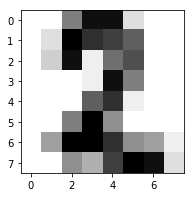

In [30]:
# Test if import works correctly
import numpy as np

i = 120
print(y_train[i])
img = np.reshape(x_train[i], (-1, 8))

import matplotlib.pyplot as plt 
plt.figure(1, figsize=(3, 3))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [11]:
#parameters
layer_sizes = [64,10]

In [18]:
import numpy as np

# Activation function, should be the logistic function
def afunc(input):
    return 1/(1+np.exp(-x))


# Derivative of the activation function
def afuncDerivative(input):
    x*(1-x)
    return None

# Initialization of layers
layers = []
for i in range(len(layer_sizes)):
    layers.append(2*np.random.random((layer_sizes[i],1)) - 1)
    
# Initialization of weights
weights = []
for i in range(1,len(layer_sizes)):
    weights.append(2*np.random.random((layer_sizes[i-1],layer_sizes[i])) - 1)

# Training function
def train(training_set):
    for x in range(len(x_train)):
        output = None
        layer_output = []
        layer_output.append(x_train(x))
        for i in range(len(weights)):
            layer_output.append()
    
    
    return None
    



In [20]:
for x in weights:
    print(x)

[[-0.37898581  0.13202387  0.7547482  -0.51480986  0.99165832 -0.59398896
   0.47693247  0.23444177  0.34990579 -0.13399954]
 [ 0.30761029  0.01556265  0.21791017 -0.58572615 -0.96379074  0.76119107
   0.86340941 -0.4381359   0.31591505 -0.16855001]
 [-0.97745549 -0.67160586  0.48540655 -0.44901418  0.51837152 -0.75417531
  -0.22697608  0.76932122 -0.9663105   0.08069968]
 [-0.49786828  0.99024279 -0.16406662  0.50390231 -0.12806898 -0.22531184
  -0.63391811 -0.11621061 -0.41683581  0.62424994]
 [ 0.94326466  0.84263353 -0.45114267  0.4458082   0.07343227 -0.52843816
   0.37184552 -0.9967184  -0.34113466 -0.33882093]
 [-0.64808686  0.96336326 -0.51097685  0.83401407 -0.36181903 -0.16734217
   0.9611615   0.68080275  0.10198083 -0.19567124]
 [ 0.28969091 -0.77870314 -0.66688723  0.55273504 -0.3402311  -0.21731125
   0.34330154  0.8457186  -0.63195821 -0.78923388]
 [-0.24394877  0.02194068 -0.49421289  0.18142794 -0.697466    0.48098642
  -0.48993172  0.59395147  0.30778264 -0.93177709]
